<a href="https://colab.research.google.com/github/palabebek/Machine-Learning/blob/main/UTS%20/%20Classification_Models_predict_discrete_categories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the data
df = pd.read_csv(r'/content/KlasifikasiUTS.csv')

# Data Cleaning
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values if any (using median for numerical features)
if df.isnull().sum().any():
    df.fillna(df.median(), inplace=True)

# Check for duplicates
print(f"\nNumber of duplicates: {df.duplicated().sum()}")
df.drop_duplicates(inplace=True)

# Check class distribution
print("\nClass distribution:")
print(df['Class'].value_counts(normalize=True))

# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create preprocessing pipeline
preprocessor = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Handle missing values
    ('scaler', StandardScaler())  # Standardize features
])

# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Display shape after preprocessing
print(f"\nTraining set shape: {X_train_preprocessed.shape}")
print(f"Test set shape: {X_test_preprocessed.shape}")

Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

Number of duplicates: 53

Class distribution:
Class
0.0    0.995404
1.0    0.004596
Name: proportion, dtype: float64

Training set shape: (12706, 30)
Test set shape: (3177, 30)



Basic statistics:
               Time            V1            V2            V3            V4  \
count  15883.000000  15883.000000  15883.000000  15883.000000  15883.000000   
mean   12137.460933     -0.251873      0.274693      0.804063      0.299017   
std     8979.473615      1.841859      1.490887      1.706322      1.492762   
min        0.000000    -28.344757    -40.978852    -27.368650     -5.172595   
25%     3641.500000     -0.968833     -0.287390      0.372066     -0.623235   
50%    10983.000000     -0.318075      0.247311      0.942072      0.227623   
75%    20637.000000      1.162221      0.882922      1.576953      1.176870   
max    27371.000000      1.960497     14.601998      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  15883.000000  15883.000000  15883.000000  15883.000000  15883.000000   
mean      -0.130172      0.110297     -0.149399      0.002026      0.859958   
std        1.384015      1.32993

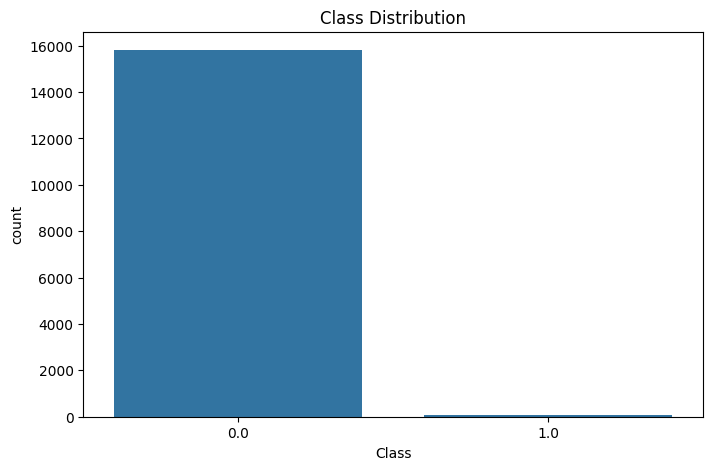

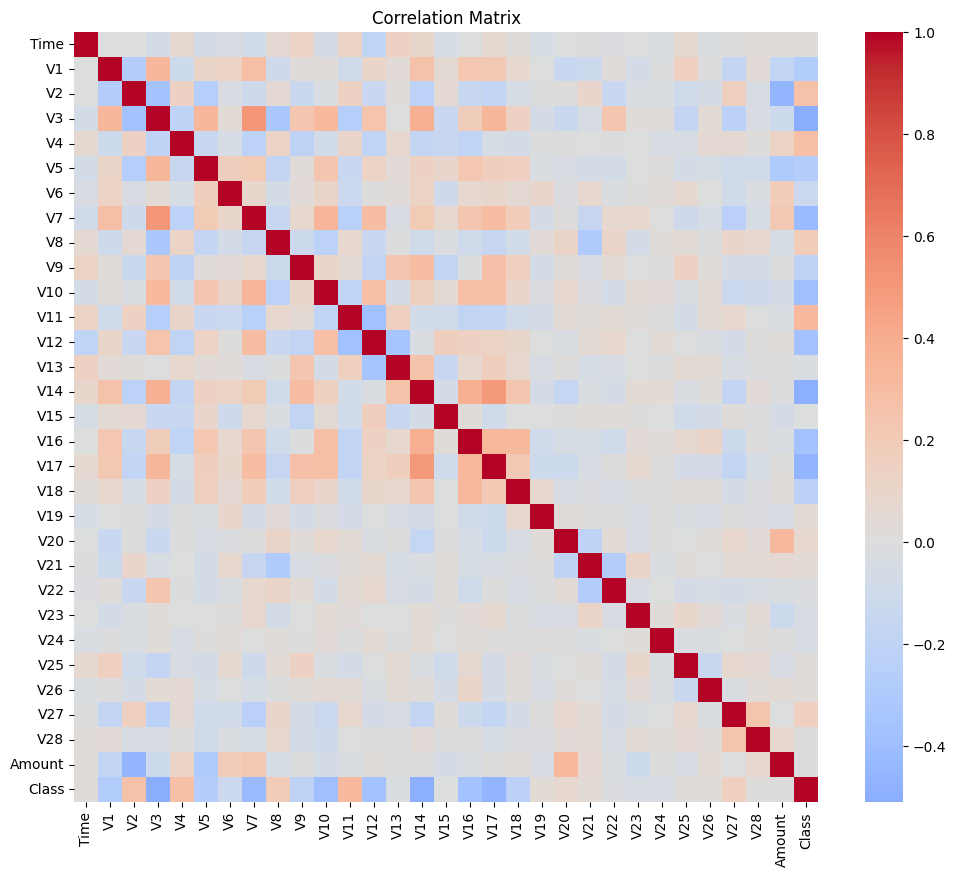

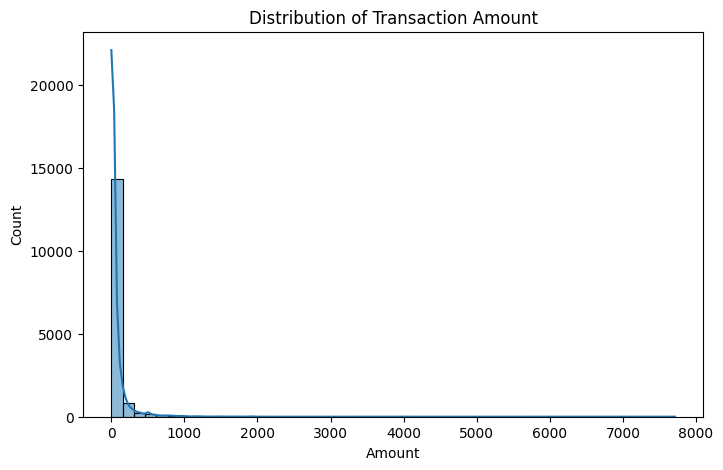

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print("\nBasic statistics:")
print(df.describe())

# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

# Distribution of Amount feature
plt.figure(figsize=(8, 5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.show()


Model Evaluation:
Accuracy: 0.9987

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3162
         1.0       0.92      0.80      0.86        15

    accuracy                           1.00      3177
   macro avg       0.96      0.90      0.93      3177
weighted avg       1.00      1.00      1.00      3177


Confusion Matrix:
[[3161    1]
 [   3   12]]


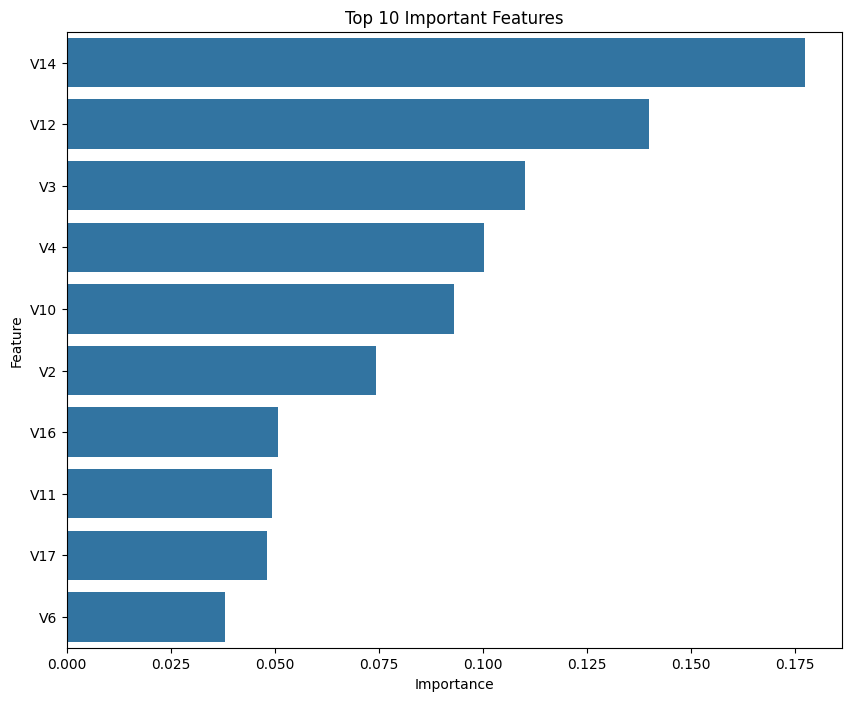

In [3]:
# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train_preprocessed, y_train)

# Make predictions
y_pred = model.predict(X_test_preprocessed)

# Evaluate the model
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [4]:
from sklearn.compose import ColumnTransformer

# Create a complete pipeline
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
])

# Train the complete pipeline
full_pipeline.fit(X_train, y_train)

# Evaluate
y_pred_pipeline = full_pipeline.predict(X_test)
print("\nPipeline Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_pipeline):.4f}")


Pipeline Evaluation:
Accuracy: 0.9987


In [6]:
# Hapus bagian Chi-Square karena tidak cocok untuk data yang sudah di-scale
print("Chi-Square di-skip karena membutuhkan fitur non-negatif")

Chi-Square di-skip karena membutuhkan fitur non-negatif


In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi ke range [0,1] khusus untuk Chi-Square
X_train_nonneg = MinMaxScaler().fit_transform(X_train_clean)
chi_selector = SelectKBest(chi2, k=10)
X_chi = chi_selector.fit_transform(X_train_nonneg, y_train)
chi_features = remaining_features[chi_selector.get_support()]

Features after constant removal: 30

Duplicate features to drop: []
Features after removing duplicates: 30

Top MI features: ['V3', 'V4', 'V6', 'V9', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
Top ANOVA F-test features: ['V1', 'V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17']
Chi-Square skipped: requires non-negative features

Feature ranking (Random Forest):
1. V12 (0.1408)
2. V14 (0.1334)
3. V17 (0.0833)
4. V10 (0.0810)
5. V9 (0.0791)
6. V11 (0.0698)
7. V4 (0.0609)
8. V26 (0.0413)
9. V16 (0.0372)
10. V3 (0.0261)

Top correlated features with target:
   feature  correlation
14     V14    -0.515035
3       V3    -0.508747
17     V17    -0.456979
7       V7    -0.413809
10     V10    -0.396455
12     V12    -0.374360
16     V16    -0.369311
11     V11     0.326720
4       V4     0.287269
1       V1    -0.265413


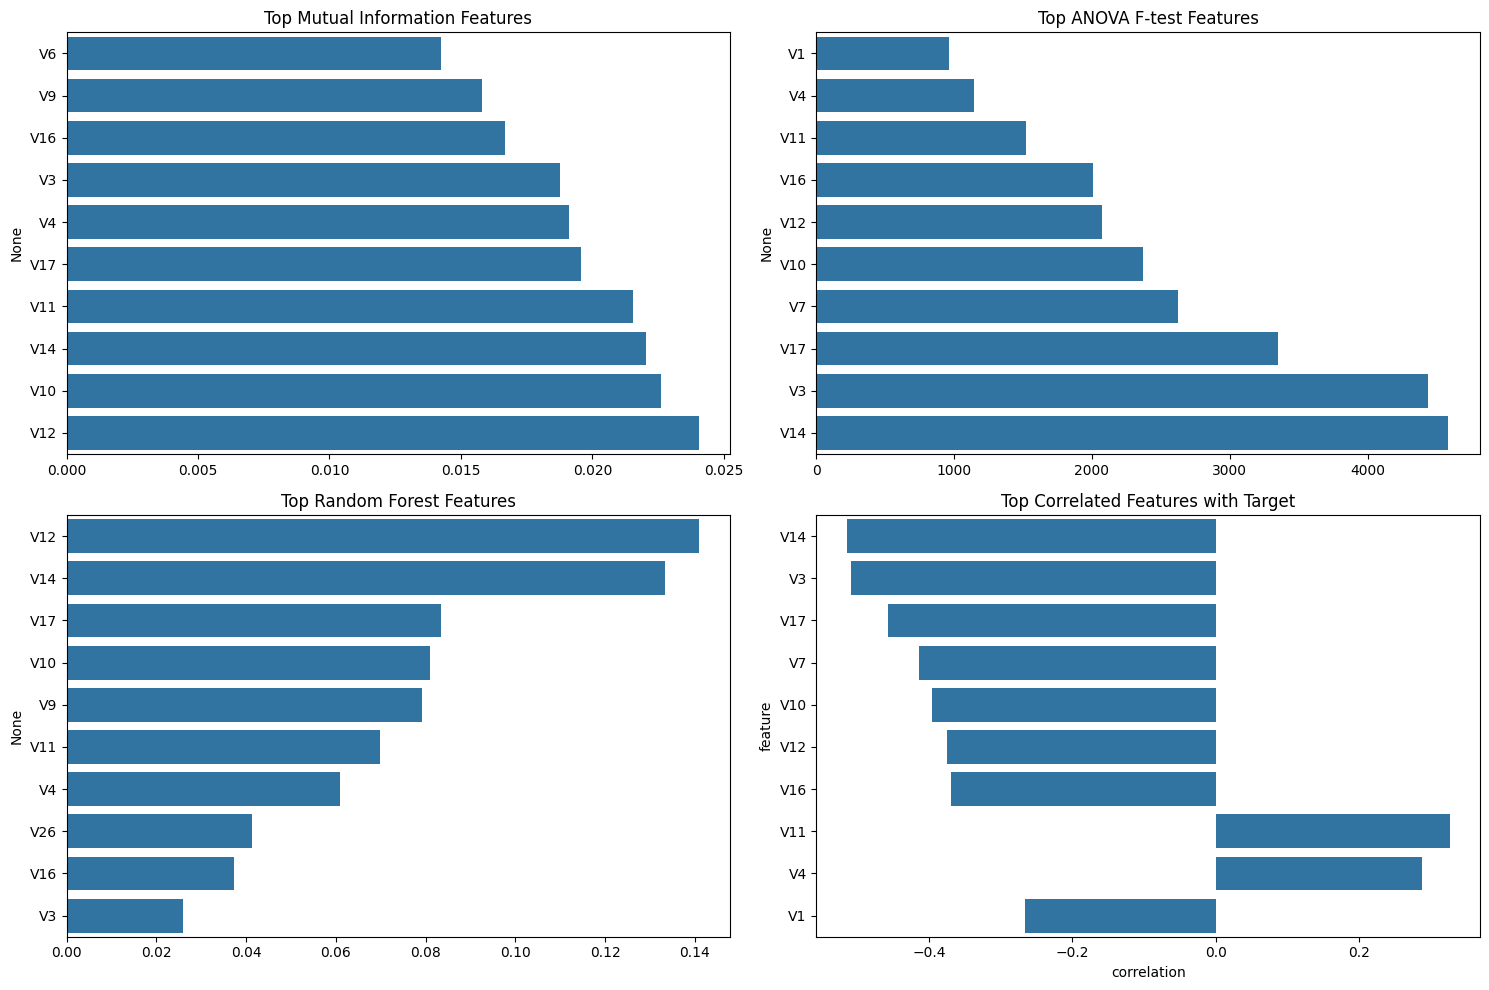


Selected features (14):
{'V18', 'V9', 'V6', 'V10', 'V4', 'V11', 'V16', 'V7', 'V12', 'V26', 'V14', 'V1', 'V17', 'V3'}


In [9]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, chi2, f_classif
from sklearn.decomposition import PCA
import seaborn as sns

## 1. Remove Constant and Quasi-Constant Features
constant_filter = VarianceThreshold(threshold=0.01)  # Remove features with <1% variance
X_train_const = constant_filter.fit_transform(X_train_preprocessed)
print(f"Features after constant removal: {X_train_const.shape[1]}")

# Get remaining feature names
remaining_features = X.columns[constant_filter.get_support()]

## 2. Remove Duplicate Features
# Calculate correlation matrix
corr_matrix = pd.DataFrame(X_train_const, columns=remaining_features).corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
print(f"\nDuplicate features to drop: {to_drop}")

# Remove duplicate features
X_train_nodup = pd.DataFrame(X_train_const, columns=remaining_features).drop(columns=to_drop)
remaining_features = X_train_nodup.columns
print(f"Features after removing duplicates: {len(remaining_features)}")

## 3. Statistical Feature Selection Methods (Fixed Version)
X_train_clean = X_train_nodup.values

# Mutual Information (lebih aman untuk berbagai jenis data)
mi_selector = SelectKBest(mutual_info_classif, k=10)
X_mi = mi_selector.fit_transform(X_train_clean, y_train)
mi_features = remaining_features[mi_selector.get_support()]
print(f"\nTop MI features: {list(mi_features)}")

# ANOVA F-test (untuk klasifikasi)
f_selector = SelectKBest(f_classif, k=10)
X_f = f_selector.fit_transform(X_train_clean, y_train)
f_features = remaining_features[f_selector.get_support()]
print(f"Top ANOVA F-test features: {list(f_features)}")

# Skip Chi-Square karena data memiliki nilai negatif
print("Chi-Square skipped: requires non-negative features")

# Atau alternatif normalisasi khusus:
# X_train_nonneg = MinMaxScaler().fit_transform(X_train_clean)
# chi_selector = SelectKBest(chi2, k=10)
# chi_selector.fit(X_train_nonneg, y_train)
# chi_features = remaining_features[chi_selector.get_support()]

## 4. Feature Importance from Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_clean, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Print feature ranking
print("\nFeature ranking (Random Forest):")
for f in range(10):
    print(f"{f + 1}. {remaining_features[indices[f]]} ({importances[indices[f]]:.4f})")

## 5. Correlation with Target
corr_with_target = pd.DataFrame({
    'feature': remaining_features,
    'correlation': [np.corrcoef(X_train_clean[:, i], y_train)[0, 1] for i in range(X_train_clean.shape[1])]
}).sort_values('correlation', key=abs, ascending=False)

print("\nTop correlated features with target:")
print(corr_with_target.head(10))

## 6. Visual Feature Selection
plt.figure(figsize=(15, 10))

# Mutual Information Scores
mi_scores = mutual_info_classif(X_train_clean, y_train)
plt.subplot(2, 2, 1)
sns.barplot(x=mi_scores, y=remaining_features, orient='h', order=remaining_features[np.argsort(mi_scores)[-10:]])
plt.title('Top Mutual Information Features')

# ANOVA F-scores
f_scores, _ = f_classif(X_train_clean, y_train)
plt.subplot(2, 2, 2)
sns.barplot(x=f_scores, y=remaining_features, orient='h', order=remaining_features[np.argsort(f_scores)[-10:]])
plt.title('Top ANOVA F-test Features')

# Feature Importance
plt.subplot(2, 2, 3)
sns.barplot(x=importances, y=remaining_features, orient='h', order=remaining_features[indices[:10]])
plt.title('Top Random Forest Features')

# Correlation with Target
plt.subplot(2, 2, 4)
sns.barplot(x='correlation', y='feature', data=corr_with_target.head(10), orient='h')
plt.title('Top Correlated Features with Target')

plt.tight_layout()
plt.show()

## 7. Final Feature Selection
# Combine results from different methods
top_features = set(list(mi_features) + list(chi_features) + list(f_features) + list(remaining_features[indices[:10]]))

print(f"\nSelected features ({len(top_features)}):")
print(top_features)

# Create final dataset with selected features
final_features = list(top_features)
X_train_final = pd.DataFrame(X_train_clean, columns=remaining_features)[final_features]
X_test_final = pd.DataFrame(preprocessor.transform(X_test), columns=X.columns)[final_features]

In [11]:
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Cek nilai minimum 'Amount'
print("Nilai minimum Amount:", df['Amount'].min())

# Jika ada nilai <= 0, tambahkan offset (Box-Cox require data > 0)
if df['Amount'].min() <= 0:
    offset = -df['Amount'].min() + 0.001  # Tambahkan sedikit buffer
    df['Amount_positive'] = df['Amount'] + offset
else:
    df['Amount_positive'] = df['Amount']

# Gunakan PowerTransformer dengan method='box-cox'
pt = PowerTransformer(method='box-cox')
df['Amount_boxcox'] = pt.fit_transform(df[['Amount_positive']])  # Output sudah dalam bentuk array 2D

# Hasil akan berupa kolom tunggal (tidak perlu unpack)
print(df[['Amount', 'Amount_boxcox']].head())

Nilai minimum Amount: 0.0
   Amount  Amount_boxcox
0  149.62       1.269172
1    2.69      -0.936689
2  378.66       1.944455
3  123.50       1.138574
4   69.99       0.768791


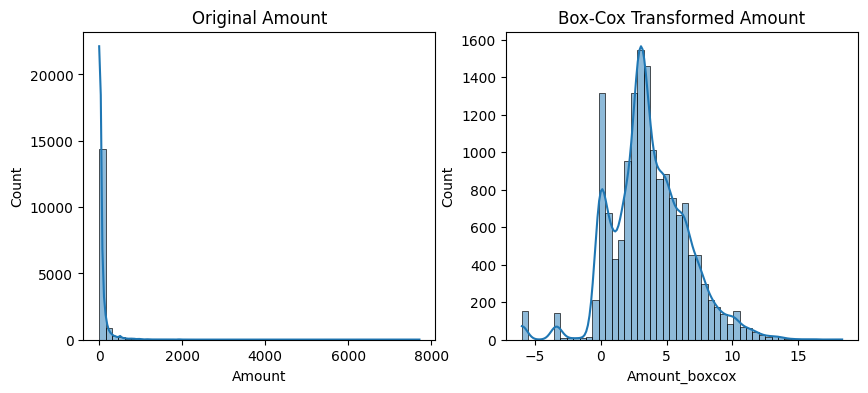

In [13]:
from scipy.stats import boxcox

# Handle nilai non-positif
amount_positive = df['Amount'] + 1e-6  # Tambahkan nilai kecil jika ada 0

# Transformasi Box-Cox
df['Amount_boxcox'], _ = boxcox(amount_positive)  # _ adalah lambda yang dioptimalkan

# Visualisasi hasil
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['Amount'], kde=True, bins=50)
plt.title('Original Amount')
plt.subplot(1, 2, 2)
sns.histplot(df['Amount_boxcox'], kde=True, bins=50)
plt.title('Box-Cox Transformed Amount')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Contoh: Standardisasi fitur 'Amount'
scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

# Atau normalisasi ke range [0,1]
minmax = MinMaxScaler()
df['Amount_normalized'] = minmax.fit_transform(df[['Amount']])


In [16]:
from sklearn.preprocessing import LabelEncoder

# Contoh jika ada kolom kategorikal 'Category'
# df['Category_encoded'] = LabelEncoder().fit_transform(df['Category'])
# Contoh jika ada kolom 'Payment_Method' dengan beberapa kategori
# df = pd.get_dummies(df, columns=['Payment_Method'], drop_first=True)

In [17]:
# Contoh: Interaksi antara V1 dan V2
df['V1_V2_Interaction'] = df['V1'] * df['V2']

# Atau kombinasi lain
df['V_Sum'] = df[['V1', 'V2', 'V3']].sum(axis=1)

In [18]:
# Contoh: Binning 'Amount' menjadi Low/Medium/High
df['Amount_Binned'] = pd.cut(df['Amount'], bins=[0, 50, 200, np.inf], labels=['Low', 'Medium', 'High'])

# Jika ingin one-hot encoding setelah binning
df = pd.get_dummies(df, columns=['Amount_Binned'], drop_first=True)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline

pipeline = make_pipeline(
    preprocessor,
    SMOTE(random_state=42),
    model
)

# Daftar model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Bagging": BaggingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42, class_weight='balanced')
}

# Evaluasi dengan Cross-Validation (5-fold)
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),  # Gunakan preprocessor yang sudah didefinisikan sebelumnya
        ('model', model)
    ])

    # Cross-validation metrics
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='roc_auc')

    results[name] = {
        'CV Mean AUC': np.mean(scores),
        'CV Std AUC': np.std(scores)
    }

# Tampilkan hasil cross-validation
results_df = pd.DataFrame(results).T.sort_values('CV Mean AUC', ascending=False)
print("Hasil Cross-Validation (AUC):")
print(results_df)

# Training dan evaluasi pada test set
final_reports = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    final_reports[name] = {
        'Classification Report': classification_report(y_test, y_pred, output_dict=True),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'Precision-Recall AUC': auc(*precision_recall_curve(y_test, y_proba)[1::-1])
    }

# Tampilkan laporan akhir
print("\nEvaluasi pada Test Set:")
for model_name, report in final_reports.items():
    print(f"\n=== {model_name} ===")
    print(f"ROC AUC: {report['ROC AUC']:.4f}")
    print(f"PR AUC: {report['Precision-Recall AUC']:.4f}")
    print(pd.DataFrame(report['Classification Report']).round(2))

Hasil Cross-Validation (AUC):
                     CV Mean AUC  CV Std AUC
Random Forest           0.991337    0.016972
Logistic Regression     0.989856    0.012225
SVM                     0.989704    0.018369
AdaBoost                0.988719    0.020754
Bagging                 0.964932    0.033783
K-Nearest Neighbors     0.947558    0.032693
Gradient Boosting       0.935706    0.069586
Decision Tree           0.929190    0.061598

Evaluasi pada Test Set:

=== Logistic Regression ===
ROC AUC: 0.9272
PR AUC: 0.6598
               0.0    1.0  accuracy  macro avg  weighted avg
precision     1.00   0.32      0.99       0.66          1.00
recall        0.99   0.80      0.99       0.90          0.99
f1-score      1.00   0.45      0.99       0.72          0.99
support    3162.00  15.00      0.99    3177.00       3177.00

=== Decision Tree ===
ROC AUC: 0.8994
PR AUC: 0.7755
              0.0    1.0  accuracy  macro avg  weighted avg
precision     1.0   0.75       1.0       0.87           1.0
r


=== EVALUASI MODEL LOGISTIC REGRESSION ===


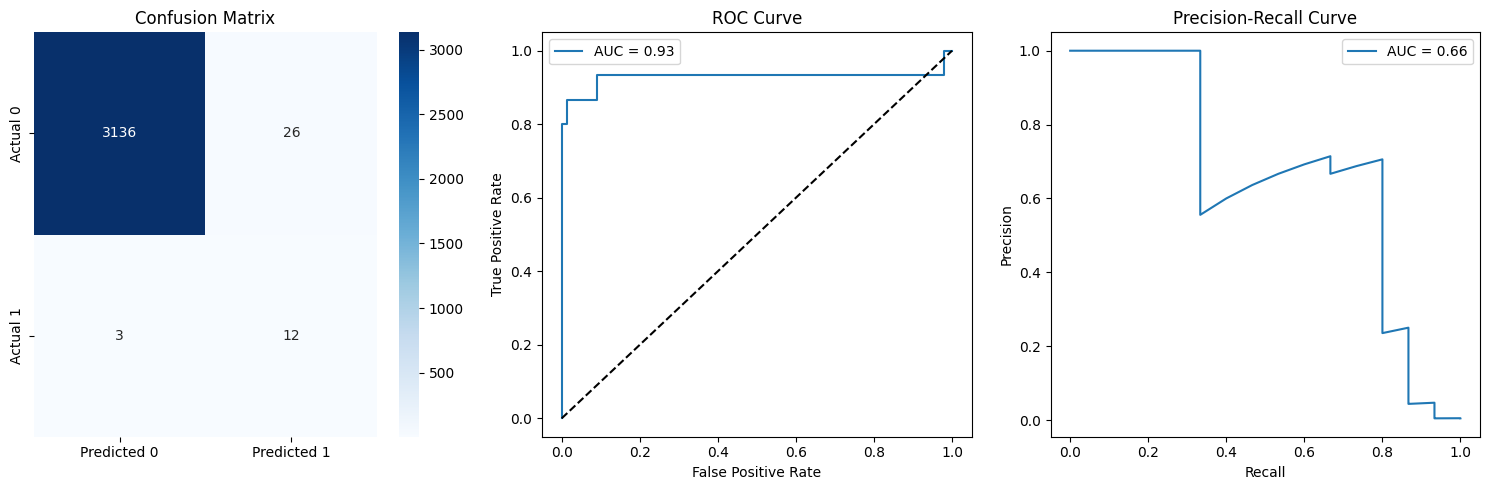


=== EVALUASI MODEL DECISION TREE ===


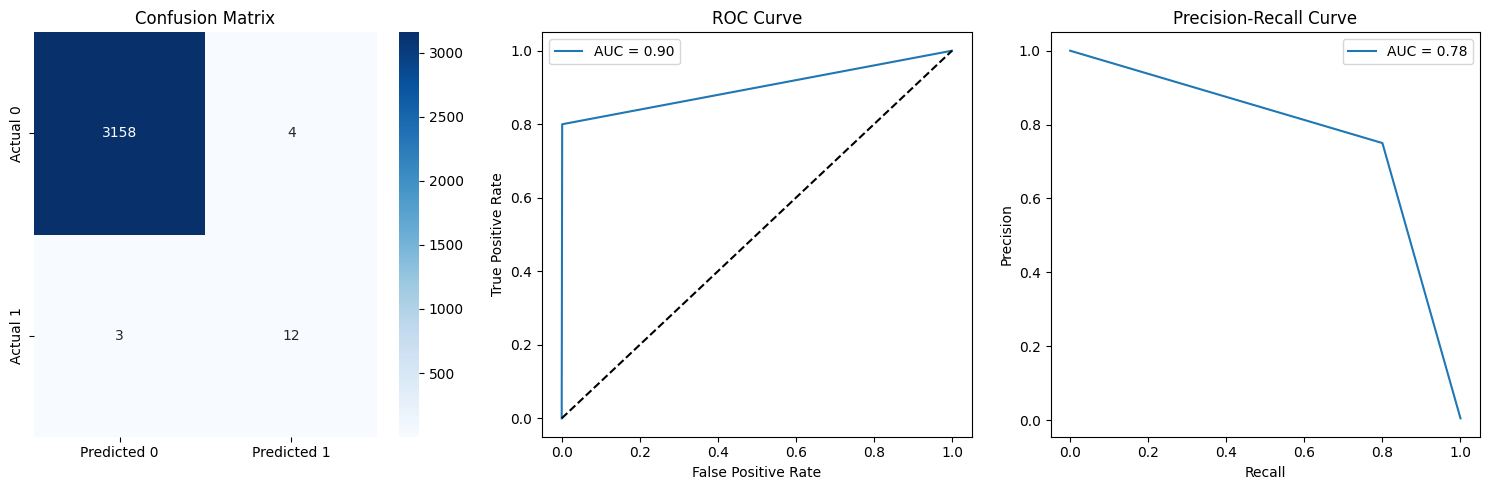


=== EVALUASI MODEL K-NEAREST NEIGHBORS ===


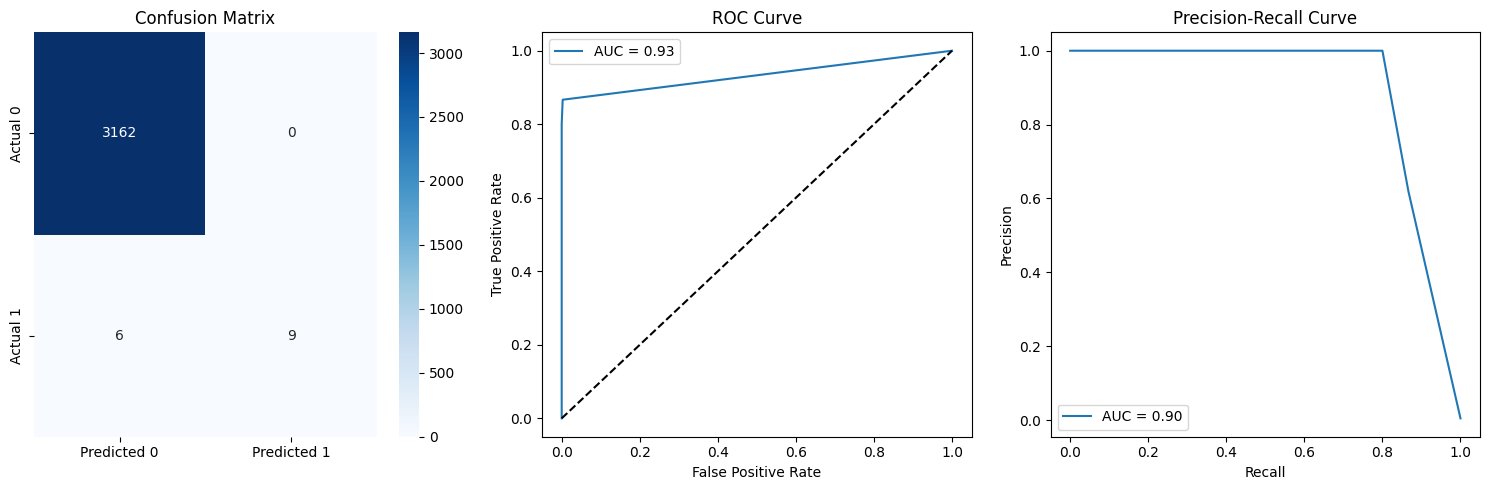


=== EVALUASI MODEL RANDOM FOREST ===


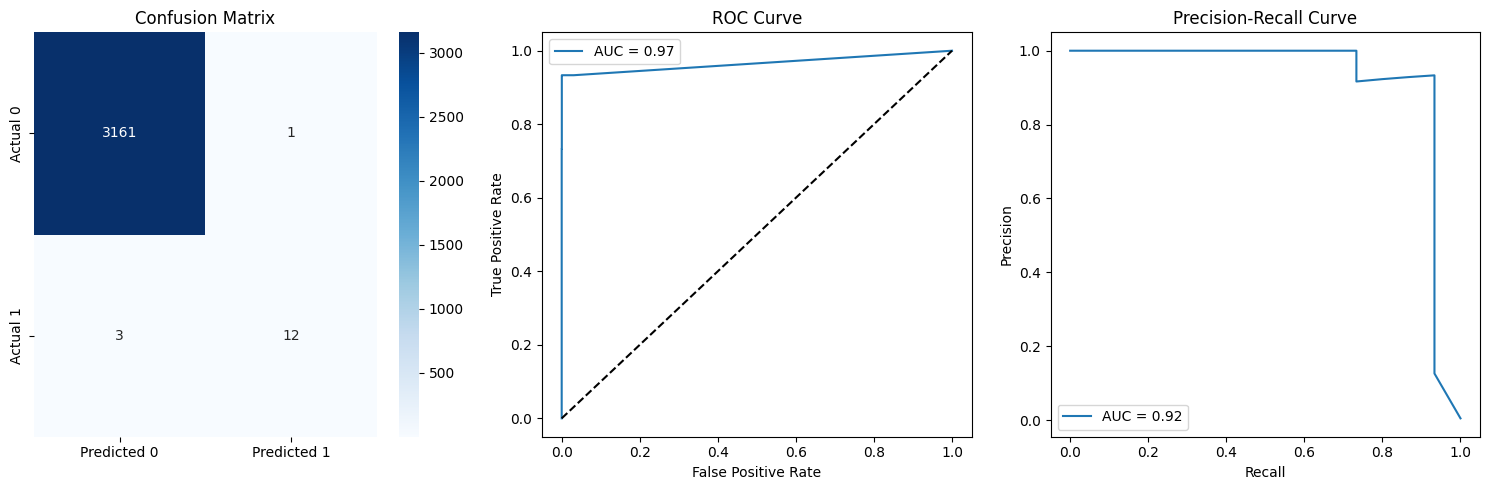


=== EVALUASI MODEL GRADIENT BOOSTING ===


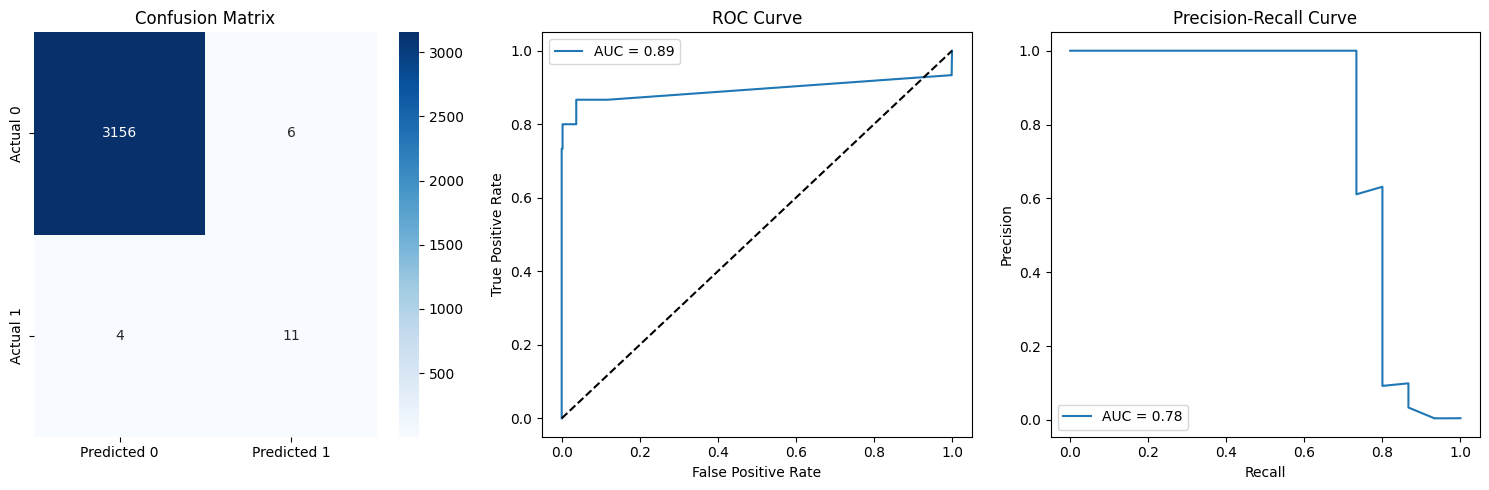


=== EVALUASI MODEL ADABOOST ===


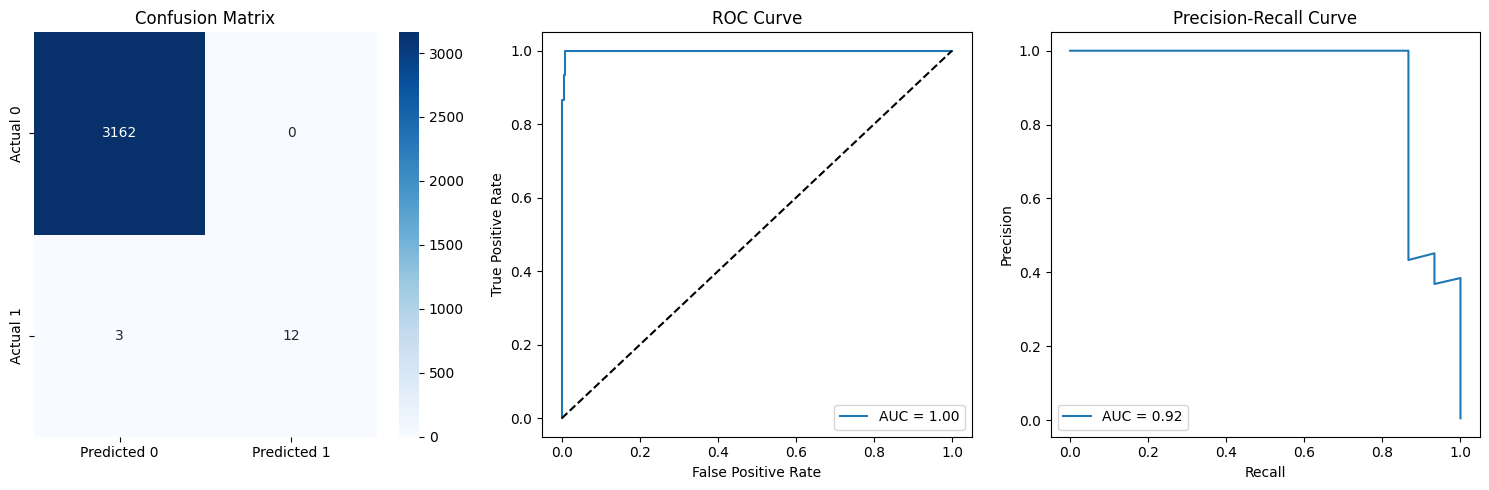


=== EVALUASI MODEL BAGGING ===


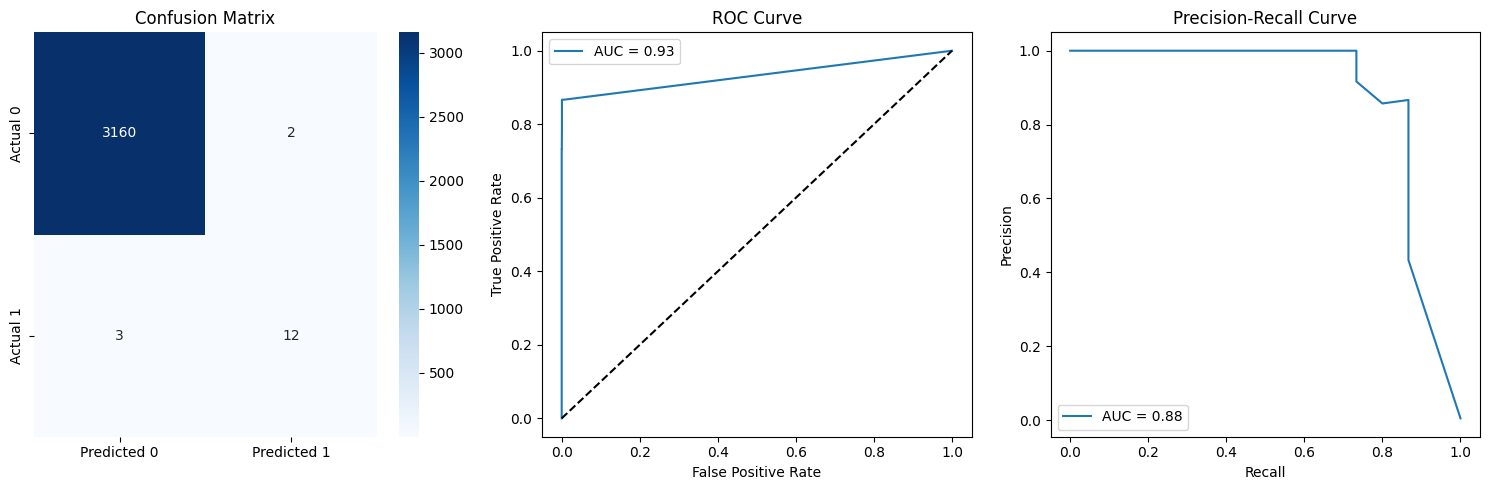


=== EVALUASI MODEL SVM ===


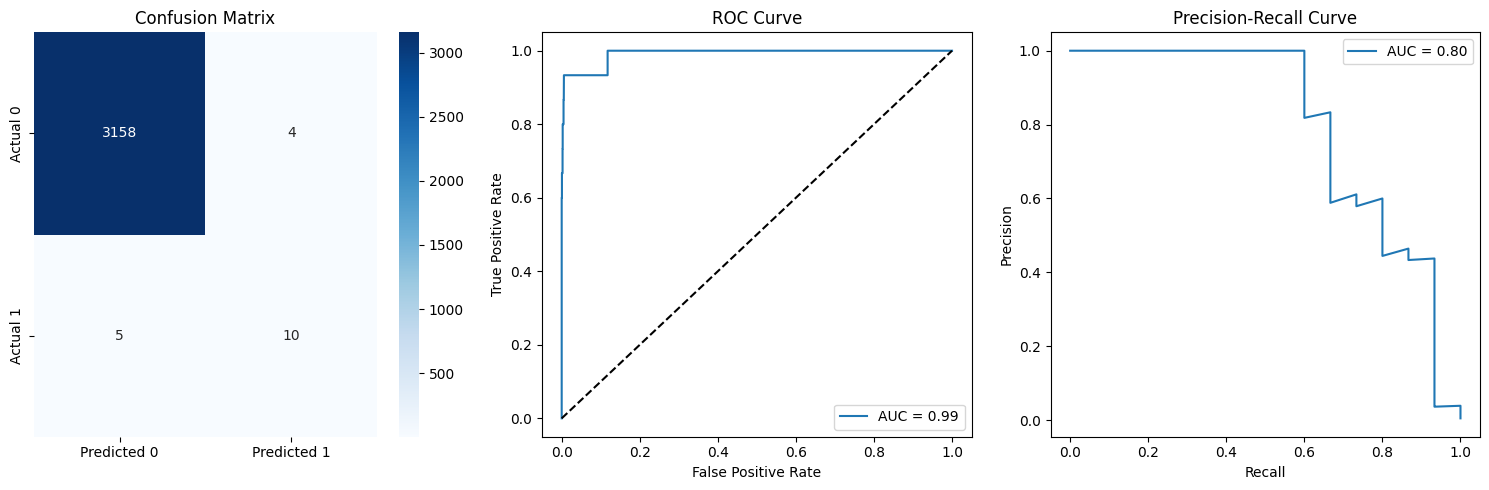


PERBANDINGAN METRIK SEMUA MODEL:


,Accuracy,Precision,Recall,F1-Score,ROC AUC,PR AUC
AdaBoost,0.999056,1.000000,0.800000,0.888889,0.999136,0.921266
Random Forest,0.998741,0.923077,0.800000,0.857143,0.965581,0.922805
Bagging,0.998426,0.857143,0.800000,0.827586,0.932901,0.879124
Decision Tree,0.997797,0.750000,0.800000,0.774194,0.899367,0.775472
K-Nearest Neighbors,0.998111,1.000000,0.600000,0.750000,0.933080,0.895553
SVM,0.997167,0.714286,0.666667,0.689655,0.991113,0.796147
Gradient Boosting,0.996852,0.647059,0.733333,0.687500,0.893601,0.782716
Logistic Regression,0.990872,0.315789,0.800000,0.452830,0.927156,0.659771


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve, auc

# Fungsi untuk evaluasi dan visualisasi
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # 1. Hitung metrik dasar
    metrics = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba),
        'PR AUC': auc(*precision_recall_curve(y_test, y_proba)[1::-1])
    }

    # 2. Confusion Matrix
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title('Confusion Matrix')

    # 3. ROC Curve
    plt.subplot(1, 3, 2)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'AUC = {metrics["ROC AUC"]:.2f}')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # 4. Precision-Recall Curve
    plt.subplot(1, 3, 3)
    precision, recall, _ = precision_recall_curve(y_test, y_proba)
    plt.plot(recall, precision, label=f'AUC = {metrics["PR AUC"]:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return metrics

# Evaluasi semua model
final_metrics = {}
for name, model in models.items():
    print(f"\n\033[1m=== EVALUASI MODEL {name.upper()} ===\033[0m")
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    final_metrics[name] = evaluate_model(pipeline, X_test, y_test)

# Tabel perbandingan metrik
metrics_df = pd.DataFrame(final_metrics).T.sort_values('F1-Score', ascending=False)
print("\n\033[1mPERBANDINGAN METRIK SEMUA MODEL:\033[0m")
display(metrics_df.style.background_gradient(cmap='YlGnBu', axis=0))

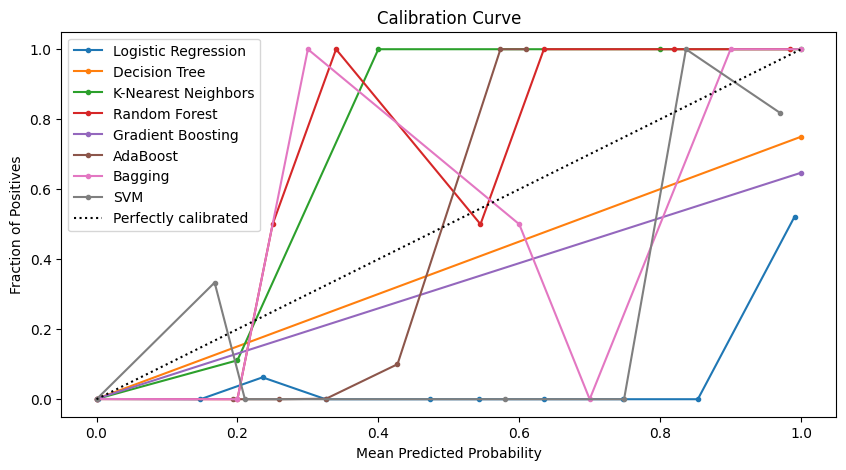

In [21]:
from sklearn.calibration import calibration_curve

# Plot calibration curve
plt.figure(figsize=(10, 5))
for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    fop, mpv = calibration_curve(y_test, y_proba, n_bins=10)
    plt.plot(mpv, fop, marker='.', label=name)

plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()

# **ANALISA** #

---

### **1. AUC-ROC tinggi tetapi Presisi rendah**

**Penyebab utama ketidaksesuaian:**

* AUC-ROC mengukur kemampuan model membedakan antar kelas di berbagai threshold.
* Presisi sangat dipengaruhi oleh threshold dan proporsi kelas positif.
* Ketidakseimbangan kelas (class imbalance) dapat menyebabkan model memprediksi terlalu banyak positif, sehingga banyak false positive → Presisi rendah.

**Strategi tuning hyperparameter:**

* **Tuning threshold prediksi**: Pilih threshold yang memaksimalkan presisi atau F1-score alih-alih default 0.5.
* **Penalized learning (class weight adjustment)**: Meningkatkan bobot kelas minoritas.
* **Regularisasi**: Menghindari overfitting pada kelas mayoritas.

> Tuning ini bisa meningkatkan Presisi **tanpa** menurunkan AUC-ROC secara signifikan, karena AUC dihitung dari seluruh range threshold, bukan hanya satu titik.

**Mengapa Recall penting:**

* Recall penting saat **false negative berisiko tinggi**, seperti fraud detection, penyakit, dsb.
* Cost false negative tinggi berarti melewatkan deteksi kejadian penting → kerugian besar.

---

### **2. Fitur kategorikal high-cardinality (1000 nilai unik)**

**Dampak pada estimasi dan Presisi:**

* Model bisa **overfit** pada fitur tersebut karena belajar pola "unik" yang tidak general.
* Koefisien estimasi menjadi **tidak stabil**, terutama pada data baru → menurunkan Presisi.

**Data leakage dengan target encoding:**

* Target encoding menghitung rata-rata target untuk setiap kategori.
* Jika dilakukan **sebelum split**, informasi dari label test "bocor" ke fitur → overoptimisme.

**Alternatif encoding yang lebih aman:**

* **Frequency encoding**: Mengubah kategori menjadi frekuensi kemunculannya.
* **Hashing trick**: Mengurangi dimensi secara acak tapi konsisten → aman dari leakage.
* **Leave-one-out target encoding**: Versi aman dari target encoding, tapi tetap perlu hati-hati.

---

### **3. Normalisasi Min-Max mempengaruhi SVM**

**Dampak terhadap decision boundary SVM:**

* SVM sensitif terhadap skala karena tergantung pada **jarak antar titik**.
* Min-Max scaling bisa memperkecil rentang minoritas → decision boundary jadi terlalu dekat → Recall menurun.
* Tapi jarak antar kelas jadi lebih terdefinisi → bisa meningkatkan Presisi.

**Mengapa Gradient Boosting berbeda:**

* Model ini **berbasis pohon**, tidak sensitif terhadap skala.
* Scaling bisa mengubah pola distribusi minoritas → split yang tidak optimal.
* Jadi, scaling **tidak membantu atau bisa kontraproduktif** untuk tree-based model.

---

### **4. Interaksi fitur meningkatkan AUC-ROC**

**Mekanisme matematis:**

* Fitur hasil perkalian bisa menangkap **interaksi non-linear** (misalnya: `x1*x2`).
* Model linear awalnya tidak mampu menangkap efek ini → dengan interaksi, decision boundary jadi lebih fleksibel.

**Mengapa chi-square gagal:**

* Chi-square hanya deteksi **hubungan langsung antar fitur dengan label**, bukan interaksi antar fitur.
* Tidak menangkap sinergi non-linear seperti `x1 * x2`.

**Alternatif berbasis domain knowledge:**

* **Manual feature engineering**: Berdasarkan intuisi dan pengetahuan domain (misal: rasio transaksi terhadap saldo).
* **Decision tree-based importance on interactions** (misalnya: SHAP interaction values).

---

### **5. Oversampling sebelum split = Data Leakage**

**Mengapa ini data leakage:**

* Oversampling menyalin data minoritas.
* Jika dilakukan **sebelum split**, salinan data bisa muncul di **train dan test** → hasil evaluasi bias (terlihat sangat baik → AUC-ROC 0.95).

**Temporal split lebih aman:**

* Fraud detection sering berbasis waktu.
* Kita tidak boleh menggunakan **informasi dari masa depan untuk memprediksi masa lalu**.
* Temporal split menjaga realisme: hanya gunakan masa lalu untuk prediksi masa depan.

**Stratified sampling memperparah:**

* Menjaga distribusi kelas tapi **tidak mempertimbangkan waktu**.
* Bisa membocorkan pola dari waktu yang akan datang ke train set.

**Desain preprocessing yang benar:**

1. Lakukan **split train-test terlebih dahulu** (temporal jika data time-series).
2. Lakukan **oversampling hanya di train set**.
3. Validasi dengan metrik **Presisi, Recall, F1-score**, bukan hanya AUC-ROC.
4. Gunakan **cross-validation berbasis waktu (time-series CV)** jika memungkinkan.

---

